In [1]:
%reload_ext autoreload
%autoreload 2


In [73]:
import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from datasets import liu,mohr_smith,mcswain,hou

def map_y_em(y:pd.DataFrame,dataset_name:str):
    n = len(y)
    name="em"
    columns=[name]
    if dataset_name=="liu":
        y = pd.DataFrame(y["Halpha"].to_numpy(),columns=columns)
    elif dataset_name=="hou":
        y = pd.DataFrame(np.ones(n),columns=columns)
    elif dataset_name=="mohr_smith":
        y = pd.DataFrame(y["EM"].to_numpy(),columns=columns)
    elif dataset_name=="mcswain":
        indices = y["Code"].to_numpy()=="Be"
        indices = indices.astype(int)
        y = pd.DataFrame(indices,columns=columns)
    else:
        raise ValueError(f"Unsupported dataset '{dataset_name}'")
    assert np.logical_or(y[name].to_numpy()==1,y[name].to_numpy()==0).all()
    
    
    return y

dataset_names = {"liu":liu,
                 "mohr_smith":mohr_smith,
                 "mcswain": mcswain,
                 "hou":hou}

dataset_name = "liu"
dataset = dataset_names[dataset_name]
x,y,metadata = dataset.load(dropna=True)
y = map_y_em(y,dataset_name)
xy=x.join(y)
xy.describe()

,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,em
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,15.111851,14.504733,13.592100,12.929715,13.175018,12.020854,11.785267,11.635587,0.341637
std,1.816931,1.652762,1.077114,1.025982,1.155292,1.105942,1.167985,1.205151,0.475105
min,10.980000,10.130000,11.820000,11.100000,11.160000,9.060000,8.910000,8.510000,0.000000
25%,13.840000,13.140000,12.650000,12.070000,12.100000,11.350000,11.100000,10.970000,0.000000
50%,14.630000,14.560000,13.580000,12.820000,13.140000,11.810000,11.620000,11.550000,0.000000
75%,16.180000,15.880000,14.400000,13.660000,14.010000,12.730000,12.550000,12.430000,1.000000
max,23.710000,18.130000,16.470000,16.310000,16.300000,16.310000,16.210000,16.000000,1.000000


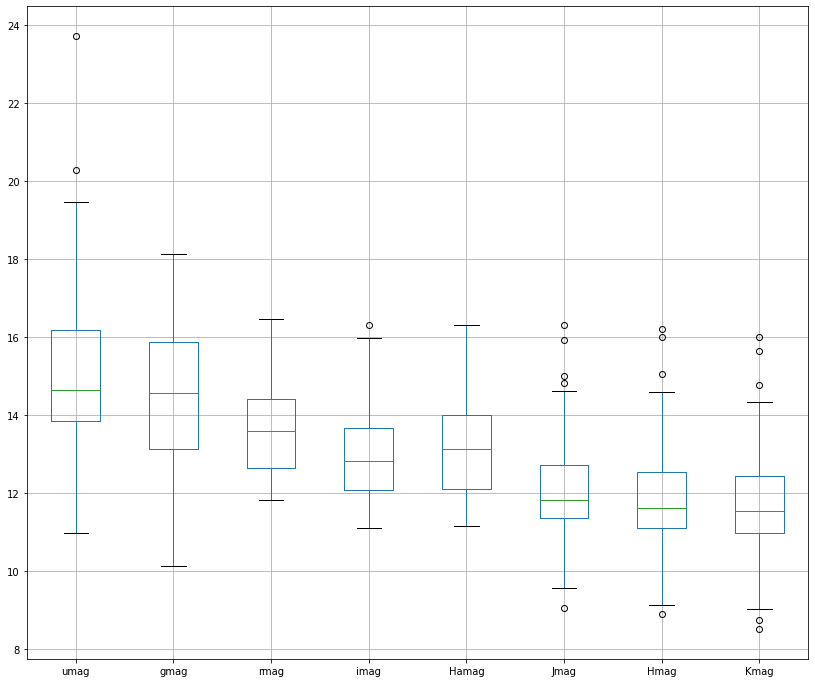

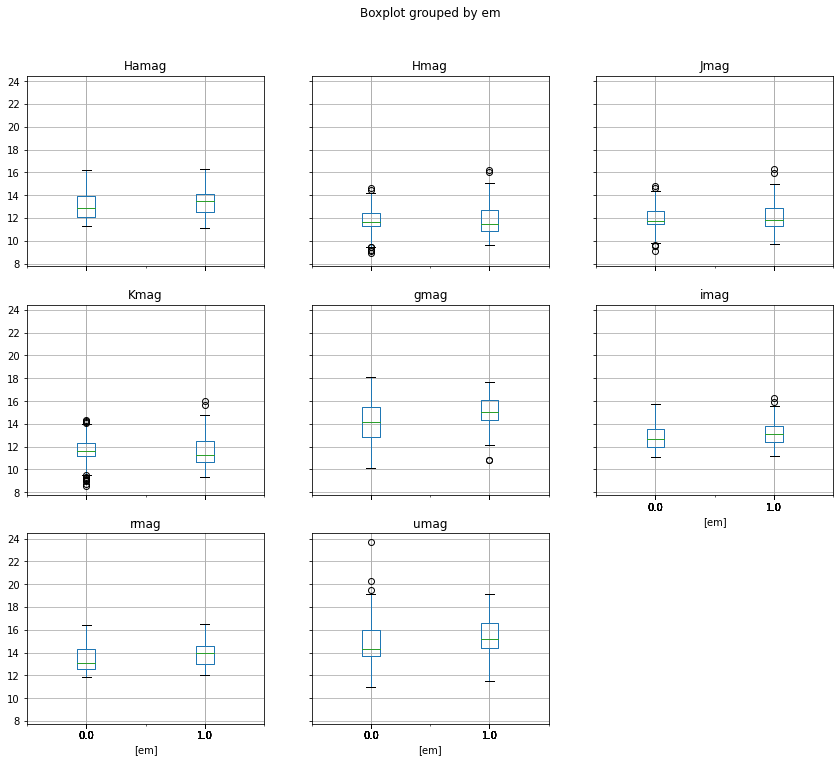

In [74]:
x.boxplot(figsize=(14,12))
_=xy.boxplot(by="em",figsize=(14,12))

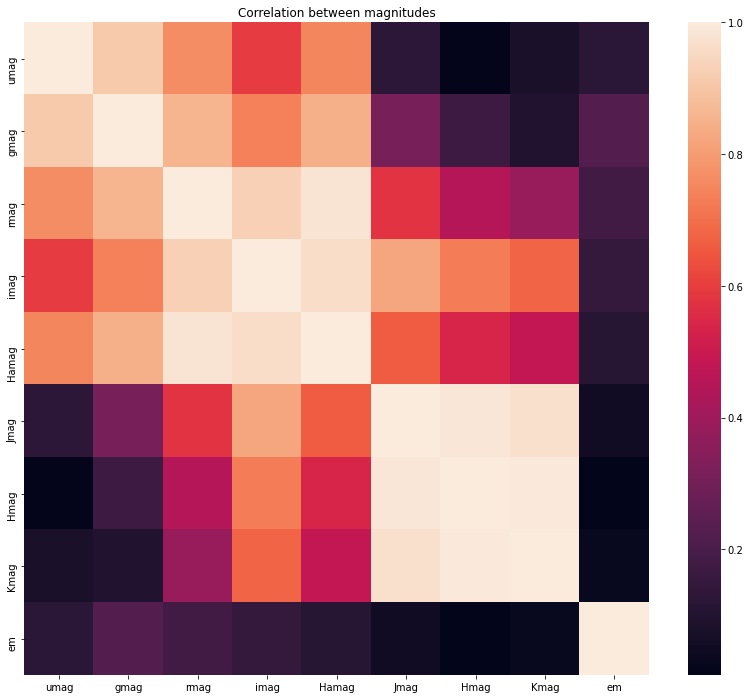

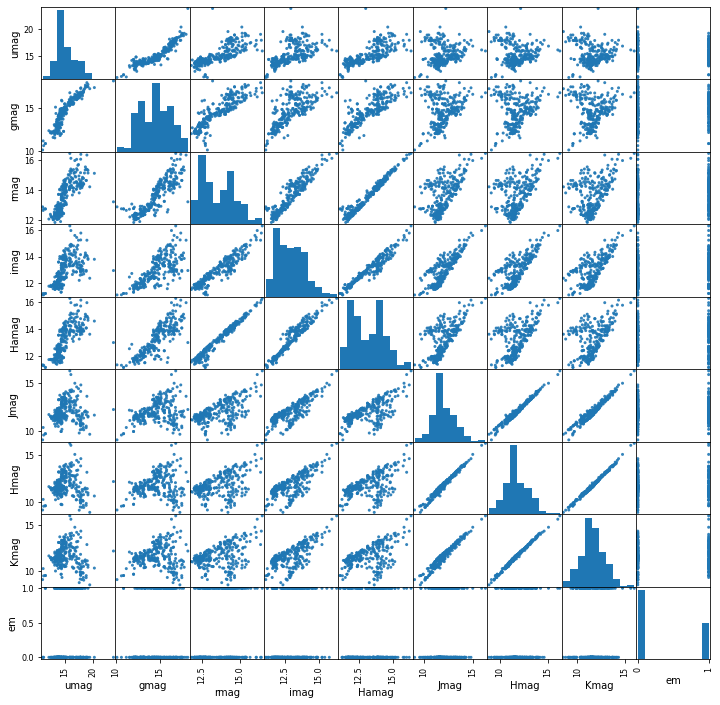

In [75]:
f=plt.figure(figsize = (14,12))
sn.heatmap(xy.corr().abs())
plt.title("Correlation between magnitudes")
plt.show()

axes=pd.plotting.scatter_matrix(xy,alpha=0.9,grid=False,figsize=(12,12))

plt.show()

In [77]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope,EmpiricalCovariance

# outlier_model= LocalOutlierFactor(n_neighbors=35, contamination=0.1)
outlier_model = EllipticEnvelope()
y_pred = outlier_model.fit_predict(x.to_numpy())
print(y_pred)
outliers=(y_pred==-1).sum()
print(f"Found {outliers} outliers out of {len(x)} samples")



[ 1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
Found 27 outliers out of 281 samples


In [78]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset.coefficients
systems = dataset.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q=qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=3)
print(x_np.shape,x_np.min(),x_np.max())
m = q.magnitudes
print(m.shape,m.min(),m.max())

q_df = pd.DataFrame(m, columns = [q.column_names])

(281, 8) 8.51 23.71
(281, 56) -33.58307189542484 11.668431372549017


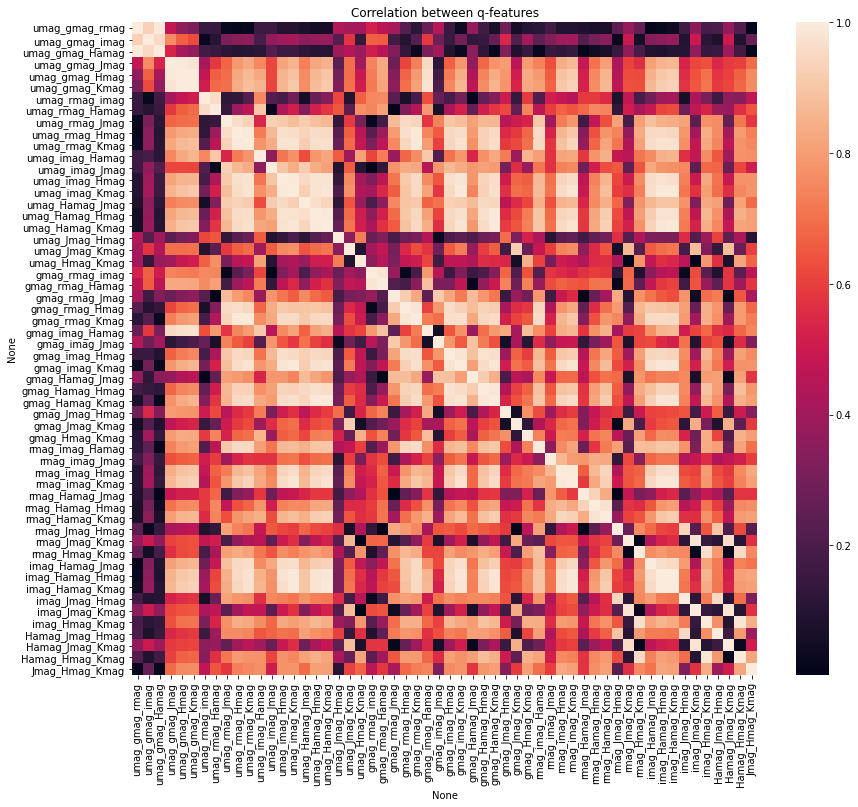

In [79]:
f=plt.figure(figsize = (14,12))
sn.heatmap(q_df.corr().abs())
plt.title("Correlation between q-features")
plt.show()

